Notebook that plots raw 12-lead ECG waveformas into a format more familiar to physicians. Update data_directory and file_id. 

Requires biosppy library for now -- but not really using anything critical from that package except for band-pass filter which can be easily subbed.

In [1]:
from collections import defaultdict
import h5py
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from biosppy.signals import ecg

# IPython imports
from IPython.display import Image

In [57]:
def _translate(val, cur_min, cur_max, new_min, new_max):
    val -= cur_min
    val /= (cur_max - cur_min)
    val *= (new_max - new_min)
    val += new_min
    return val

In [118]:
def png_from_ecg_hd5(file_id, hd5, my_dpi = 72, y_pixels = 800, folder='./'):
    matplotlib.rcParams['savefig.pad_inches'] = 0
    fig, ax = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(2500/my_dpi, y_pixels/my_dpi), dpi=my_dpi)
    
    xplot = list(np.arange(0, 10, 10/5000))
    lead_names = ['strip_I','strip_aVR', 'strip_V1', 'strip_V4','strip_II','strip_aVL', 'strip_V2', 'strip_V5',
                  'strip_III','strip_aVF', 'strip_V3', 'strip_V6']
    for lead_name in lead_names:
        voltages = list(hd5['ecg_rest'][lead_name])
        rand_second = np.random.uniform(7.5)
        ax[0].set_xlim(rand_second, rand_second+2.5)
        ax[1].set_xlim(rand_second, rand_second+2.5)

        #ax[0].yaxis.set_minor_locator(AutoMinorLocator(5000))
        ax[0].axis('off')
        ax[0].margins(0,0)

        #ax[1].xaxis.set_major_locator(plt.NullLocator()) # major grids at every .2sec = 5 * 0.04 sec
        #ax[1].yaxis.set_major_locator(plt.NullLocator()) # major grids at every .5mV 
        #ax[1].yaxis.set_minor_locator(AutoMinorLocator(500))
        ax[1].axis('off')
        ax[1].margins(0,0)

        ymax = np.max(voltages)
        ymin = np.min(voltages)
        std = np.std(voltages)


        mu = np.mean(voltages)
        std = np.std(voltages)
        
        [ ax[0].axhline(y=xc, color='grey', alpha=0.2) for xc in np.arange(-y_pixels/2, y_pixels/2, y_pixels/20) ]
        [ ax[1].axhline(y=xc, color='grey', alpha=0.2) for xc in np.arange(-8.0, 8.0, 1.0) ]
        ax[0].plot(xplot, [_translate(elem_, ymin, ymax, -y_pixels/2, y_pixels/2) for elem_ in voltages], label=lead_name, alpha=0.9)
        ax[0].set_title(f'{file_id} Offset in seconds:{rand_second:0.3f}')
        ax[1].plot(xplot, [(elem_-mu)/(1e-6+std) for elem_ in voltages], label=lead_name, alpha=0.9)
        plt.subplots_adjust(0,0,1,1,0,0)

    fig.savefig(f'{folder}/{file_id}_{rand_second:0.8f}.png', bbox_inches='tight', pad_inches=0.0, dpi=my_dpi)

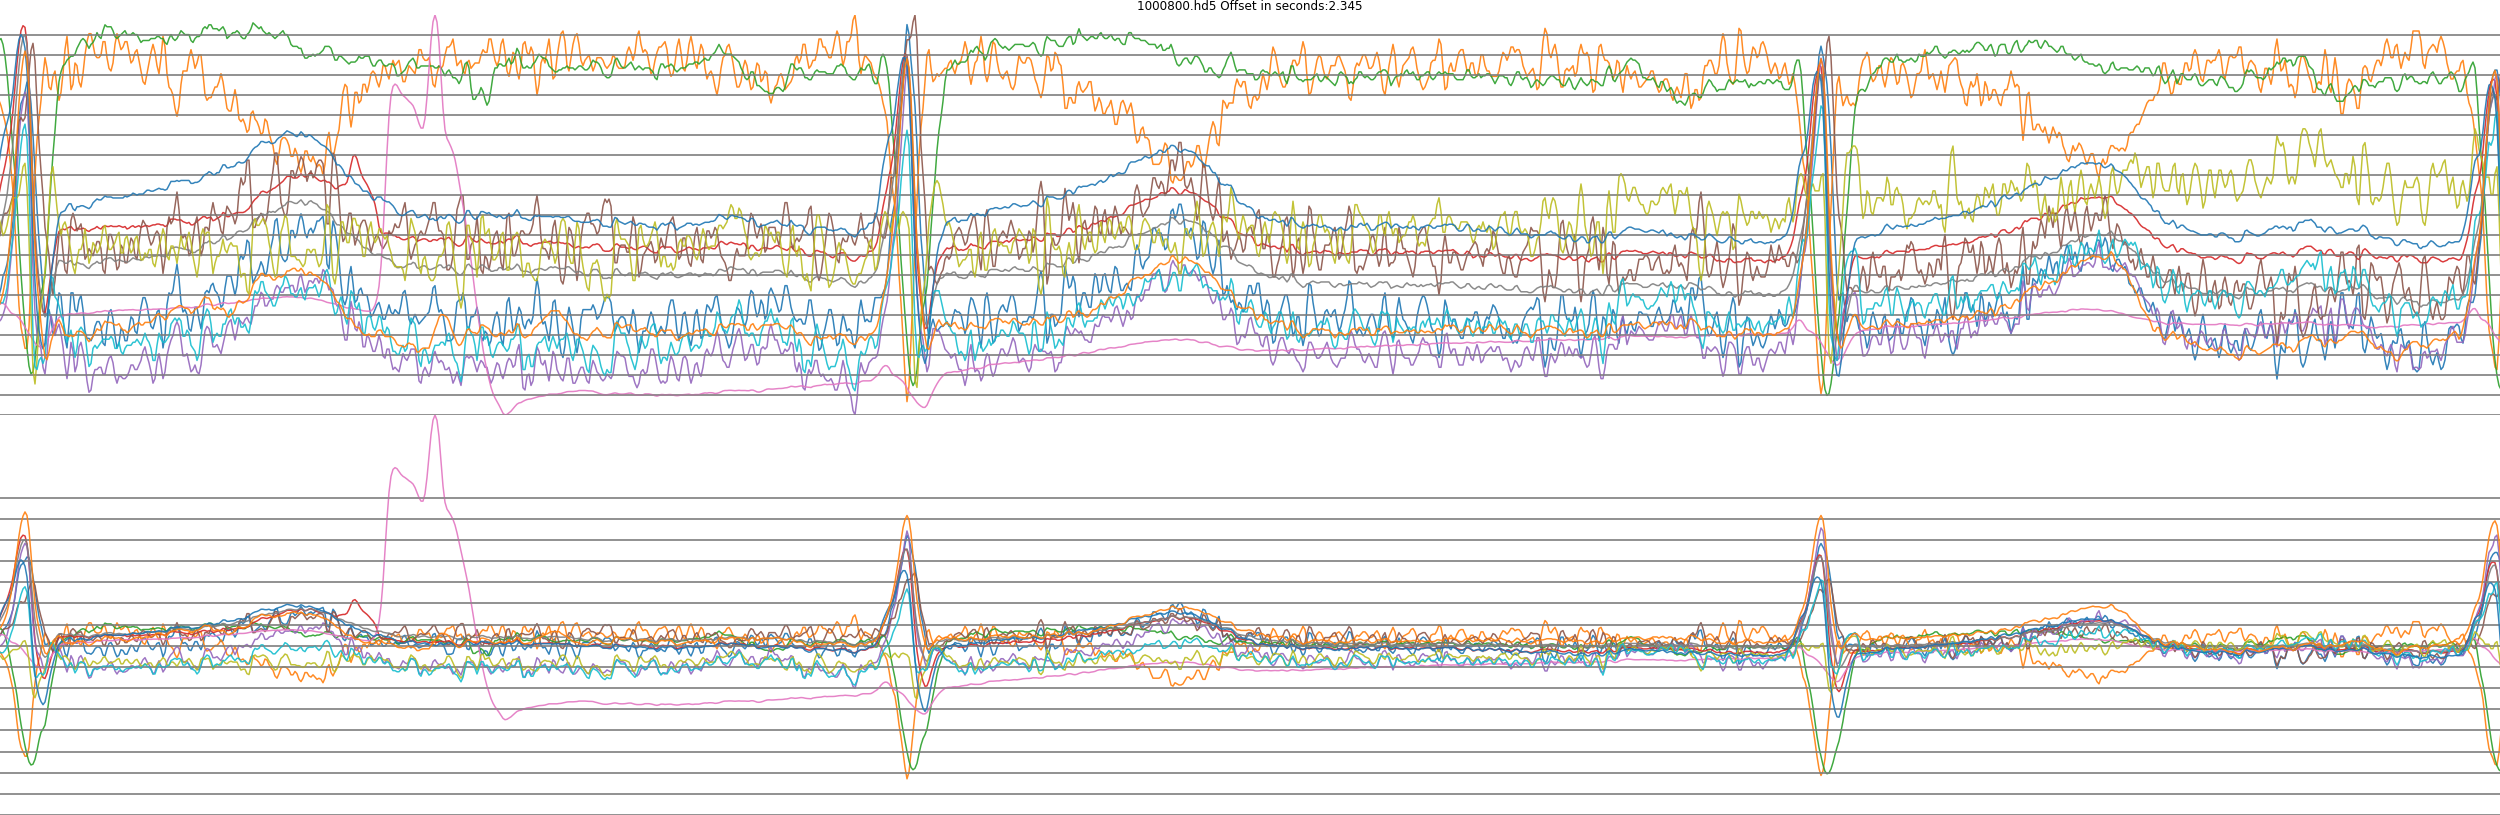

In [119]:
DATA_DIRECTORY = '/mnt/disks/ecg-rest-36k-tensors/2019-10-22/'
file_id = '1000800.hd5'
with h5py.File(os.path.join(DATA_DIRECTORY, file_id)) as hd5:
    png_from_ecg_hd5(file_id, hd5)
    

In [ ]:
for f in os.listdir(DATA_DIRECTORY):
    with h5py.File(os.path.join(DATA_DIRECTORY, f)) as hd5:
        png_from_ecg_hd5(f, hd5)